# **GenoVarDis@IberLEF2024: Automatic Genomic Variants and Related Diseases using Named Entity Recognition with Large Language Models**

## Autor: Víctor Manuel Oliveros Villena


In [ ]:
# Esta es la ruta a la raíz de nuestro Drive.
# Si se prefiere otra ruta, añadir los directorios pertinentes a continuación de esta.
path_drive = '/content/drive/MyDrive'

### **Configuración del entorno**

In [ ]:
import numpy as np
from google.colab import drive
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


### **Lectura de archivos**

In [ ]:
# Ruta al archivo TSV en Google Drive
path_train_text = path_drive + '/GenoVarDis/Data/train_text.tsv'
path_train_annotation = path_drive + '/GenoVarDis/Data/train_annotation.tsv'
path_dev_text = path_drive + '/GenoVarDis/Data/dev_text.tsv'
path_dev_annotation = path_drive + '/GenoVarDis/Data/dev_annotation.tsv'

# Lectura de archivos TSV utilizando pandas
train_text = pd.read_csv(path_train_text, sep='\t')
train_annotation = pd.read_csv(path_train_annotation, sep='\t')
dev_text = pd.read_csv(path_dev_text, sep='\t')
dev_annotation = pd.read_csv(path_dev_annotation, sep='\t')

### **Muestra de la estructura de archivos text y annotation**

In [ ]:
# Muestra del conjunto de entrenamiento
# Si se prefiere ver los datos de manera más detallada existe la posibilidad de
# pulsar en el botón 'Convert this dataframe to an interactiva table' que
# aparece en la parte superior derecha de la tabla mostrada a continuación
train_text

,pmid,filename,text
0,12672033,pmid-12672033.txt,12672033|t|Análisis de mutaciones en DMBT1 en ...
1,12673366,pmid-12673366.txt,12673366|t|Análisis del polimorfismo G/C en la...
2,12701064,pmid-12701064.txt,12701064|t|Una nueva mutación compuesta hetero...
3,12716337,pmid-12716337.txt,12716337|t|Polimorfismo en la posición -174 de...
4,12719097,pmid-12719097.txt,12719097|t|Una nueva mutación en CACNA1F en un...
...,...,...,...
422,22042570,pmid-22042570.txt,22042570|t|Mutaciones en OPA1 en pacientes jap...
423,22048266,pmid-22048266.txt,22048266|t|Investigación exploratoria sobre la...
424,22051099,pmid-22051099.txt,22051099|t|Variación en el gen CXCR1 (IL8RA) n...
425,22104738,pmid-22104738.txt,22104738|t|Nueva mutación compuesta heterocigo...


In [ ]:
# Muestra de un ejemplo concreto del conjunto de entrenamiento
example = train_text.iloc[0]

print(f"PubMed ID: {example['pmid']}\n")
print(f"Nombre del archivo ann: {example['filename']}\n")
print(f"Caso clínico: {example['text']}\n")

PubMed ID: 12672033

Nombre del archivo ann: pmid-12672033.txt

Caso clínico: 12672033|t|Análisis de mutaciones en DMBT1 en glioblastoma, meduloblastoma y tumores oligodendrogliales
12672033|a|DMBT1 ha sido implicado como un posible gen supresor de tumores en el cromosoma 10q en cáncer de cerebro, gastrointestinal y pulmón. La deleción homocigota y la falta de expresión son dos mecanismos conocidos para la inactivación de DMBT1. Evaluamos si la mutación somática, que representa un mecanismo importante de inactivación para la mayoría de los genes supresores de tumores, ocurre en el gen DMBT1. Se analizaron un total de 102 tumores cerebrales primarios, que consistían en 25 glioblastomas multiforme, 24 meduloblastomas y 53 tumores oligodendrogliales, mediante electroforesis en gel sensible a la conformación en los 54 exones codificantes de DMBT1. Se detectaron doce sustituciones de bases diferentes en 26 (25%) tumores. Ocho sustituciones de bases resultaron en cambios de aminoácidos y 4 f

In [ ]:
# Muestra del conjunto de anotaciones del conjunto de entrenamiento
train_annotation

,pmid,filename,mark,label,offset1,offset2,span
0,12672033,pmid-12672033.ann,T1,Gene,37,42,DMBT1
1,12672033,pmid-12672033.ann,T2,Disease,46,58,glioblastoma
2,12672033,pmid-12672033.ann,T3,Disease,60,74,meduloblastoma
3,12672033,pmid-12672033.ann,T4,Disease,77,103,tumores oligodendrogliales
4,12672033,pmid-12672033.ann,T5,Gene,115,120,DMBT1
...,...,...,...,...,...,...,...
8194,22106692,pmid-22106692.ann,T23,DNAMutation,1722,1729,366delT
8195,22106692,pmid-22106692.ann,T24,Gene,1786,1790,GJB2
8196,22106692,pmid-22106692.ann,T25,Gene,1793,1797,GJB6
8197,22106692,pmid-22106692.ann,T26,OtherMutation,1900,1923,gran deleción de 342 kb


## **Representación gráfica de los datos**

In [ ]:
# Concatenamos conjuntos de entrenamiento y validación
data = pd.concat([train_annotation, dev_annotation], ignore_index=True)

### *Gráficas de frecuencias*

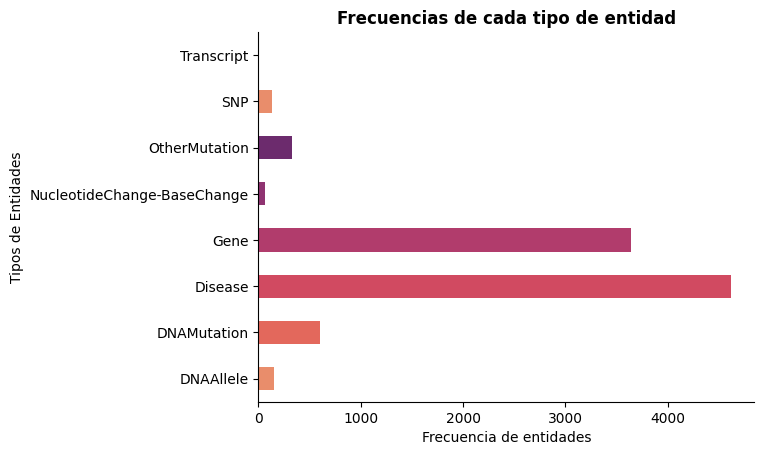

In [ ]:
# Frecuencia de etiquetas
data.groupby('label').size().plot(kind='barh', color=sns.palettes.mpl_palette('flare'))
plt.ylabel('Tipos de Entidades')
plt.xlabel('Frecuencia de entidades')
plt.title('Frecuencias de cada tipo de entidad', fontweight='bold')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
# Cuenta de las frecuencias concretas de cada etiqueta
frecuencia_labels = data['label'].value_counts()
print(frecuencia_labels)

label
Disease                        4616
Gene                           3643
DNAMutation                     599
OtherMutation                   324
DNAAllele                       151
SNP                             135
NucleotideChange-BaseChange      62
Transcript                        2
Name: count, dtype: int64


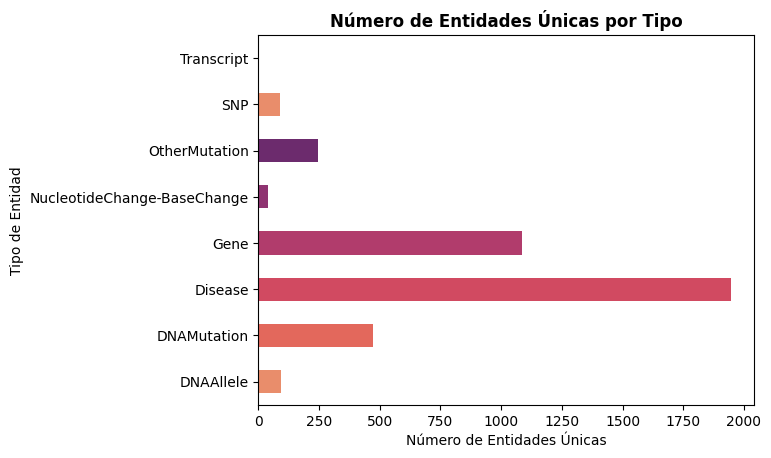

In [ ]:
# Frecuencias de entidades no unicas
data.groupby('label')['span'].nunique().plot(kind='barh', color=sns.color_palette('flare'))
plt.ylabel('Tipo de Entidad')
plt.xlabel('Número de Entidades Únicas')
plt.title('Número de Entidades Únicas por Tipo', fontweight='bold')
plt.show()

In [ ]:
# Muestra de frecuencia concreta de entidades no unicas
frecuencia_labels = data.groupby('label')['span'].nunique()
print(frecuencia_labels)

label
DNAAllele                        95
DNAMutation                     471
Disease                        1946
Gene                           1087
NucleotideChange-BaseChange      41
OtherMutation                   245
SNP                              87
Transcript                        2
Name: span, dtype: int64


### *Gráficas de distribución*

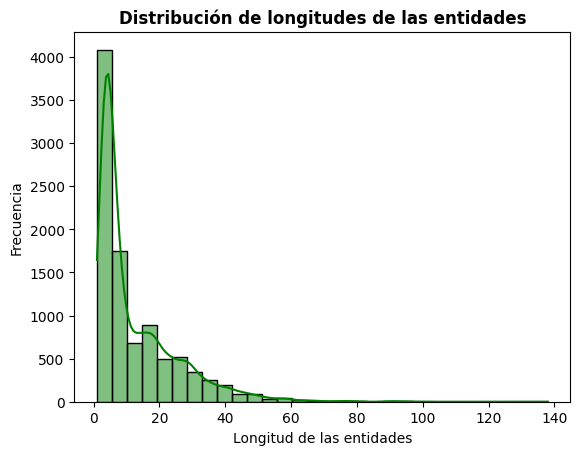

In [ ]:
# Obtención de longitud de caracteres de cada entidad
entity_lengths = data['span'].apply(len)
sns.histplot(entity_lengths, bins=30, kde=True, color='green')
plt.xlabel('Longitud de las entidades')
plt.ylabel('Frecuencia')
plt.title('Distribución de longitudes de las entidades', fontweight='bold')
plt.show()

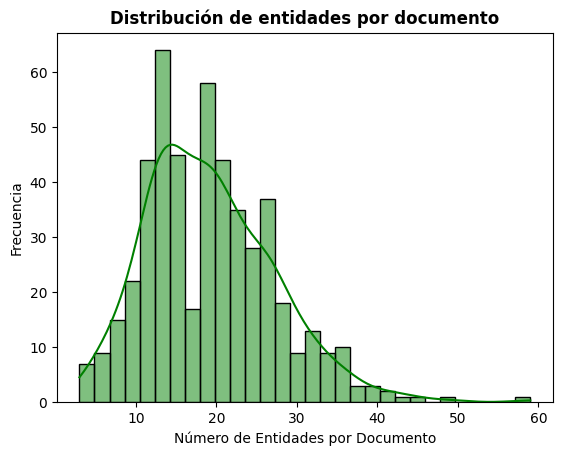

In [ ]:
# Cuenta de la cantidad de entidades en un mismo documento
entities_per_doc = data.groupby('filename')['span'].count()
sns.histplot(entities_per_doc, bins=30, kde=True, color='green')
plt.xlabel('Número de Entidades por Documento')
plt.ylabel('Frecuencia')
plt.title('Distribución de entidades por documento', fontweight='bold')
plt.show()

### *Nube de palabras*

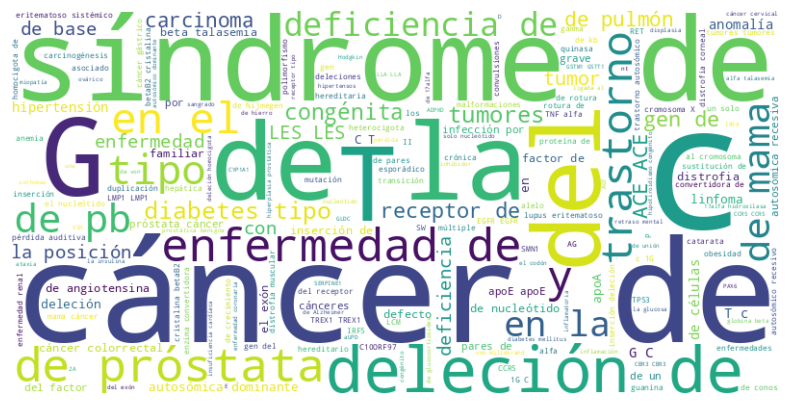

In [ ]:
# Guardamos todas las entidades como una unica cadena separada por espacios
text = ' '.join(data['span'])
# Creacion de la nube de palabras de la cadena anterior
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### *Matriz de correlación de tipos de entidades*

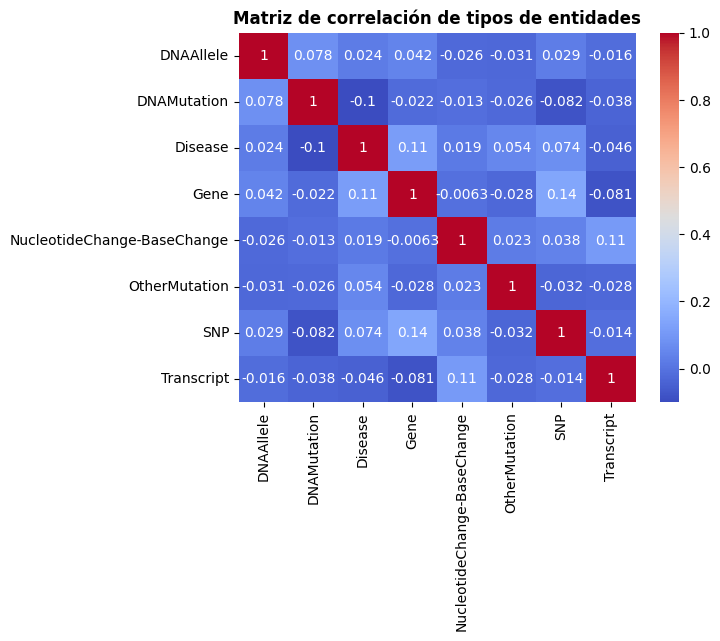

In [ ]:
# Obtencion de la matriz de correlación
label_matrix = pd.crosstab(data['filename'], data['label'])
sns.heatmap(label_matrix.corr(), annot=True, cmap='coolwarm')
plt.title('Matriz de correlación de tipos de entidades', fontweight='bold')
plt.xlabel('')
plt.ylabel('')
plt.show()